In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import math

Cleaning Data
### TempData.csv
1. Load in original data to Excel
2. Deleted Station Column
3. Deleted ALL Precp Columns
4. Saved the file as a csv file
5. Opened in VSC
6. Removed excessive spaces in data set

In [11]:
file = pd.read_csv("Data/Data.csv",header=0)

Getting rid of -9999

In [12]:
file["TAVG"]=file['TAVG'].replace(-9999,math.nan)
#drop all nans
#file.dropna(subset=["TAVG"],inplace=True)

In [13]:
file["TMIN"]=file['TMIN'].replace(-9999,math.nan)
#drop all nans
#file.dropna(subset=["TMIN"],inplace=True)

In [14]:
file["TMAX"]=file['TMAX'].replace(-9999,math.nan)
#drop all nans
#file.dropna(subset=["TMAX"],inplace=True)

Code for finding the biggest difference in temperature (Temp Question-3)

In [15]:
gap = []
try:
    for i in range(len(file)):
        diff = file["TMAX"][i]-file["TMIN"][i]
        gap.append(diff)
except:
    print(file[i])
    
#print(gap)
bigdif = max(gap)
print(bigdif)

#where is the value
Location = gap.index(bigdif)
print(file["DATE"][Location])
print(f'''
 The largest gap btwn Min and Max was on {file["DATE"][Location]}
 The temp difference was {max(gap)} degrees F
 ''')


52.0
19820116

 The largest gap btwn Min and Max was on 19820116
 The temp difference was 52.0 degrees F
 


Graphing the Temp (Temp Question-2)

1. Making the assumption that the index number is associated with the data because right now there are gaps between numbers
2. Finding locations where the average is below the min

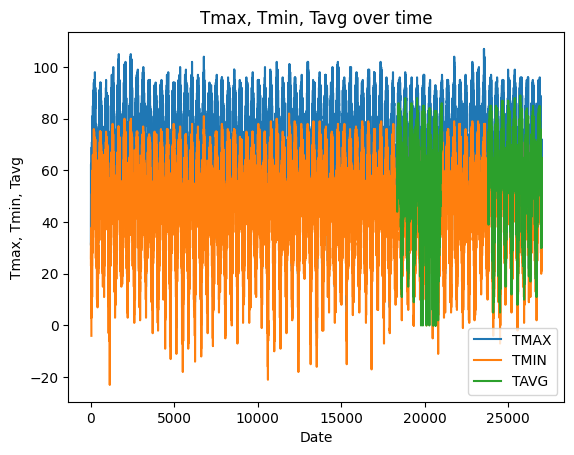

In [16]:
xdata=range(len(file))

plt.plot(xdata,file['TMAX'])
plt.plot(xdata,file['TMIN'])
plt.plot(xdata,file['TAVG'])
plt.ylabel("Tmax, Tmin, Tavg")
plt.xlabel("Date")
plt.legend(["TMAX", "TMIN", "TAVG"], loc = "lower right")
plt.title("Tmax, Tmin, Tavg over time")
plt.show()

# Temp question 1
- Make a new avg list with the Max and Min of each row, considering most averages are defunct
- Take the first average subtract it by the next average to find the change in average 
- plot the change in average

In [60]:
tempAVGList = []
for i in range(len(file)):
    tempAVG = file["TAVG"][i]
    tempAVGList.append(tempAVG)

for i in range(len(file)):
    tempAVGList[i] = (file["TMAX"][i] + file["TMIN"][i]) / 2
print(tempAVGList)

[44.0, 29.0, 30.5, 34.5, 35.0, 38.0, 37.5, 49.0, 46.5, 32.5, 33.0, 38.5, 26.5, 15.5, 26.5, 26.0, 12.5, 13.0, 23.5, 26.0, 30.0, 13.5, 9.0, 9.5, 11.0, 13.0, 14.0, 7.5, nan, 28.0, 21.0, 23.0, 23.5, 27.5, 35.0, 27.0, 18.0, 29.5, 21.5, 18.5, 20.0, 35.0, 36.0, 33.0, 31.5, 36.0, 49.5, 47.0, 53.0, 48.5, 28.0, 23.0, 23.0, 31.5, 42.5, 48.5, 54.5, 61.0, 52.5, 38.0, 41.0, 49.5, 35.0, 36.5, 35.0, 40.5, 38.5, 34.5, 40.0, 34.5, 22.5, 21.5, 34.0, 46.0, 60.0, 49.5, 45.5, 54.0, 66.0, 64.5, 69.5, 59.5, 52.0, 55.0, 57.5, 66.5, 44.5, 38.5, 51.5, 51.5, 59.5, 42.5, 44.5, 46.0, 56.5, 62.5, 69.5, 67.5, 59.0, 49.0, 50.5, 65.5, 51.0, 53.0, 44.0, 48.5, 59.5, 49.0, 57.5, 71.5, 70.5, 52.5, 54.5, 69.0, 75.0, 72.5, 71.5, 69.0, 58.5, 55.5, 51.5, 65.0, 65.0, 59.5, 56.0, 56.0, 56.5, 55.5, 61.0, 68.5, 75.5, 70.0, 64.0, 58.0, 59.5, 61.5, 69.5, 63.0, 63.0, 62.0, 65.5, 70.5, 61.5, 63.5, 65.0, 62.0, 60.5, 63.5, 70.5, 70.5, 69.5, 66.5, 63.0, 68.0, 71.5, 76.5, 77.5, 77.5, 70.5, 71.5, 68.5, 68.5, 71.5, 76.5, 76.0, 68.0, 73.5, 7

In [63]:
tempAVGChange = []
for i in range(len(tempAVGList)-1):
    Change = tempAVGList[i] - tempAVGList[i+1]
    tempAVGChange.append(Change)
print(tempAVGChange)

[15.0, -1.5, -4.0, -0.5, -3.0, 0.5, -11.5, 2.5, 14.0, -0.5, -5.5, 12.0, 11.0, -11.0, 0.5, 13.5, -0.5, -10.5, -2.5, -4.0, 16.5, 4.5, -0.5, -1.5, -2.0, -1.0, 6.5, nan, nan, 7.0, -2.0, -0.5, -4.0, -7.5, 8.0, 9.0, -11.5, 8.0, 3.0, -1.5, -15.0, -1.0, 3.0, 1.5, -4.5, -13.5, 2.5, -6.0, 4.5, 20.5, 5.0, 0.0, -8.5, -11.0, -6.0, -6.0, -6.5, 8.5, 14.5, -3.0, -8.5, 14.5, -1.5, 1.5, -5.5, 2.0, 4.0, -5.5, 5.5, 12.0, 1.0, -12.5, -12.0, -14.0, 10.5, 4.0, -8.5, -12.0, 1.5, -5.0, 10.0, 7.5, -3.0, -2.5, -9.0, 22.0, 6.0, -13.0, 0.0, -8.0, 17.0, -2.0, -1.5, -10.5, -6.0, -7.0, 2.0, 8.5, 10.0, -1.5, -15.0, 14.5, -2.0, 9.0, -4.5, -11.0, 10.5, -8.5, -14.0, 1.0, 18.0, -2.0, -14.5, -6.0, 2.5, 1.0, 2.5, 10.5, 3.0, 4.0, -13.5, 0.0, 5.5, 3.5, 0.0, -0.5, 1.0, -5.5, -7.5, -7.0, 5.5, 6.0, 6.0, -1.5, -2.0, -8.0, 6.5, 0.0, 1.0, -3.5, -5.0, 9.0, -2.0, -1.5, 3.0, 1.5, -3.0, -7.0, 0.0, 1.0, 3.0, 3.5, -5.0, -3.5, -5.0, -1.0, 0.0, 7.0, -1.0, 3.0, 0.0, -3.0, -5.0, 0.5, 8.0, -5.5, -1.0, 6.5, -5.0, -4.0, 6.0, -1.0, -10.0, -2.0, 

Text(0.5, 0, 'Date')

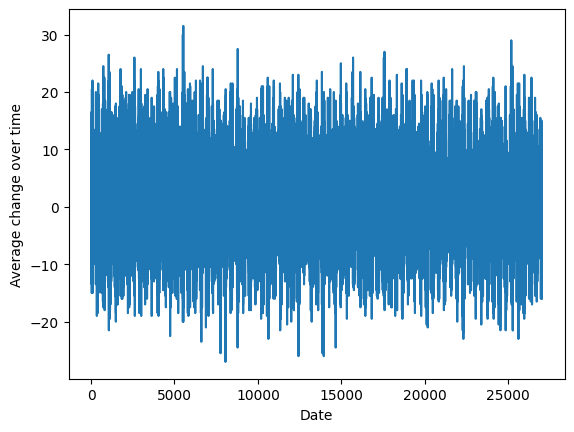

In [67]:
plt.plot(tempAVGChange)
plt.ylabel("Average change over time")
plt.xlabel("Date")

# Precipitation Questions

# Question 1 - Total Precipitation
- run through the entire file, if the year is the same as the year we are tracking right now, add the PRCP to a variable, if the year goes to the next year, append the current prcp to the list of prcp's for each year and start tracking the next year 

In [103]:
file2 = pd.read_csv("Data/EVV_Weather_Obs_2.csv",header=0)

file2["PRCP"]=file2['PRCP'].replace(-9999,math.nan)

In [108]:
years = file2["YEAR"].unique()
prcp = 0
prcpList = []
year = 1948
for i in range(len(file)):
    if file2["YEAR"][i] == year:
        prcp += file2["PRCP"][i]
    elif file2["YEAR"][i] != year:
        year += 1
        prcpList.append(round(prcp, 2))
        prcp = 0
        prcp += file2["PRCP"][i]
prcpList.append(prcp)       
print(prcpList)
        


[42.24, 53.54, 63.13, 51.37, 37.35, 29.63, 33.83, 40.52, 34.31, 53.66, 42.22, 45.12, 34.48, 47.38, 40.91, 27.88, 38.37, 35.03, 36.53, 43.19, 43.21, 49.23, 45.93, 40.25, 42.27, 46.18, 43.27, 51.01, 32.09, 50.08, 42.96, 52.21, 35.76, 43.35, 52.68, 48.48, 49.75, 45.89, 37.68, 34.51, 38.43, 47.34, 52.52, 32.68, 35.81, 45.83, 36.75, 46.46, 64.0, 47.58, 45.67, 39.34, 48.55, 49.88, 50.34, 39.91, 43.48, 41.17, 66.18, 37.79, 53.88, 50.2, 32.78, 70.03, 33.13, 53.58, 47.21, nan, nan, 43.48, nan, 61.22, 60.61, nan]


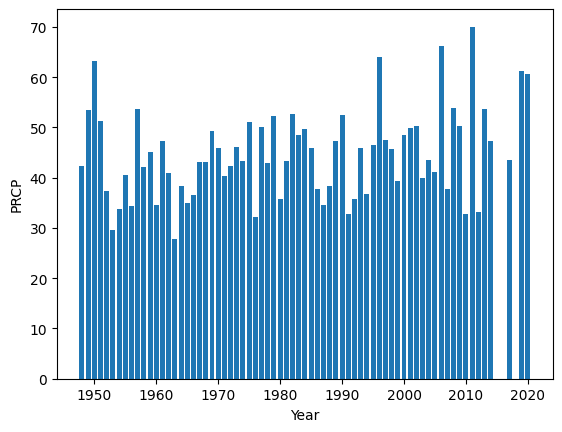

In [111]:
plt.bar(years, prcpList)
plt.xlabel("Year")
plt.ylabel("PRCP")
plt.show()

# Question 2 - PRCP During janurary
- pretty much the same things as question 1, but force it to only count january
- put the months in a variable so that there arent any 0's in front of the single digit months to disturb the data

In [120]:
years = file2["YEAR"].unique()
prcp = 0
prcpList = []
month = file2["MONTH"]
year = 1948
for i in range(len(file2)):
    if file2["YEAR"][i] == year:
        if month[i] == 1:
            prcp += file2["PRCP"][i]
    elif file2["YEAR"][i] != year:
        year += 1
        prcpList.append(round(prcp, 2))
        prcp = 0
        prcp += file2["PRCP"][i]
prcpList.append(prcp)       
print(prcpList)

0         1
1         1
2         1
3         1
4         1
         ..
27024    12
27025    12
27026    12
27027    12
27028    12
Name: MONTH, Length: 27029, dtype: int64
[2.02, 8.84, 13.5, 6.75, 3.31, 3.93, 4.96, 1.03, 2.22, 4.18, 3.0, 5.31, 1.89, 0.97, 4.38, 0.85, 2.19, 2.53, 2.89, 1.09, 2.44, 7.98, 1.0, 2.88, 1.68, 2.45, 3.63, 4.05, 2.11, 1.91, 2.64, 3.6, 1.77, 0.51, 9.15, 1.79, 0.85, 1.76, 1.15, 0.77, 3.28, 3.35, 4.26, 3.02, 0.85, 3.57, 3.18, 2.82, 3.51, 4.2, 2.24, 6.0, 4.36, 1.29, 3.72, 0.9, 2.95, 4.59, 4.09, 5.47, 3.97, 2.85, 2.41, 1.65, 3.39, 6.76, 1.69, 2.97, nan, 2.27, nan, 4.05, 5.58, 3.4100000000000006]


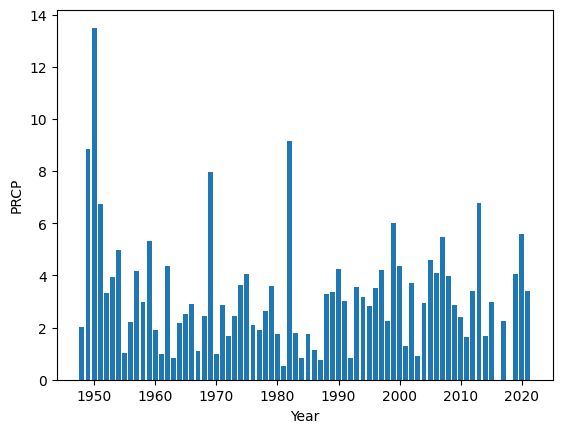

In [121]:
plt.bar(years, prcpList)
plt.xlabel("Year")
plt.ylabel("PRCP")
plt.show()

# Question 3 - How many days were there both rain and snow
- loop through the file, if PRCP and SNOW are both > 1, add 1 to the days count

In [122]:
days = 0
for i in range(len(file2)):
    if file2["PRCP"][i] > 0:
        if file2["SNOW"][i] > 0:
            days += 1
print(f"It snowed and rained on {days} different days")

It snowed and rained on 764 different days


# Question 4 - What is the longest streak of Snow Depth recorded
- Loop through the file, if the SNWD is greater than 0 and the next value is also greater than 1, add 1 to a variable until the next value is 0
- Take that varible and set it to another variable if it is greater than that other variable

In [125]:
streak = 0
tempStreak = 0
for i in range(len(file2)-1):
    if file2["SNWD"][i+1] > 0:
        tempStreak += 1
    else: 
        if tempStreak > streak:
            streak = tempStreak
        tempStreak = 0
print(f" The longest Snow Depth streak is {streak} days")

 The longest Snow Depth streak is 53 days
